In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
import numpy as np

%matplotlib inline

In [2]:
# Vwcap for 'glacier' HRU - stops breaking when bigger or eq. then 0.25
# snowacc - total snow and ice accumulation 
# - varya 

In [ ]:

from SedCas_glacier import SedCas
# from SedCas import SedCas

# 
model = SedCas()
model.load_climate()
model.load_params()
model.run_hydro()
model.run_sediment()
model.save_output()
model.plot_sedyield_monthly()

In [20]:
hydro_out = pd.read_csv('Hydro.out')#.set_index('D')
hydro_out

,D,Q,Qs,Qss,Vw,snow,snowacc,PET,AET,Pr,Ta,glacier_melt
0,1999-10-01 00:00:00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.6,0.0408
1,1999-10-01 01:00:00,0.040000,0.0,0.040000,0.000000,0.0,0.0,0.0,0.0,0.0,5.5,0.0400
2,1999-10-01 02:00:00,0.041600,0.0,0.041600,0.000000,0.0,0.0,0.0,0.0,0.0,5.7,0.0416
3,1999-10-01 03:00:00,0.090303,0.0,0.090303,0.351297,0.0,0.0,0.0,0.0,0.4,5.7,0.0416
4,1999-10-01 04:00:00,0.062108,0.0,0.062108,0.430789,0.0,0.0,0.0,0.0,0.1,5.7,0.0416
...,...,...,...,...,...,...,...,...,...,...,...,...
158539,2017-10-31 19:00:00,0.009626,0.0,0.009626,0.599051,0.0,0.0,0.0,0.0,0.0,1.4,0.0072
158540,2017-10-31 20:00:00,0.009617,0.0,0.009617,0.596634,0.0,0.0,0.0,0.0,0.0,1.4,0.0072
158541,2017-10-31 21:00:00,0.009608,0.0,0.009608,0.594226,0.0,0.0,0.0,0.0,0.0,1.4,0.0072
158542,2017-10-31 22:00:00,0.009599,0.0,0.009599,0.591827,0.0,0.0,0.0,0.0,0.0,1.4,0.0072


In [22]:
hydro_out['melt'] = np.where(hydro_out['snowacc'] > 0, 0, -1 * hydro_out['snowacc'])


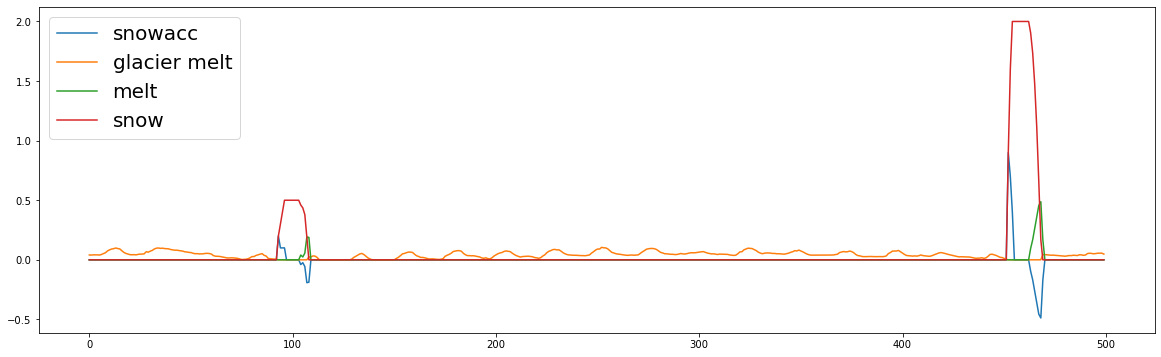

In [23]:
fig, ax = plt.subplots(figsize = (20, 6))

hydro_out2 = hydro_out[:500]

hydro_out2.snowacc.plot(label='snowacc')
hydro_out2.glacier_melt.plot(label='glacier melt')
hydro_out2['melt'].plot(label='melt')
hydro_out2.snow.plot(label = 'snow')


plt.legend()
plt.legend(fontsize = 20)


In [ ]:
ds = hydro_out.Vw.values[-1] - hydro_out.Vw.values[0] + hydro_out.snow.values[-1] - hydro_out.snow.values[0]
b = hydro_out.Pr.sum() + hydro_out.glacier_melt.sum() - hydro_out.AET.sum() - hydro_out.Q.sum() - ds


In [ ]:
b

In [ ]:
hydro_out.Q.sum()

In [ ]:
hydro_out = pd.read_csv('Hydro.out')#.set_index('D')


In [ ]:
hydro_out

In [ ]:
fig, ax = plt.subplots(figsize = (20, 6))

snowacc1 = hydro_out.snowacc * -1
melt = hydro_out.glacier_melt + hydro_out2.snow_melt

melt.plot(label = 'melt')
snowacc1.plot(label = 'snowacc')
hydro_out2.glacier_melt.plot(label = 'gl melt')
hydro_out2.snow_melt.plot(label = 'snow melt')

plt.legend()

In [ ]:
hydro_out2['allmelt'] = hydro_out2.snow_melt + hydro_out2.glacier_melt
hydro_out2['snowacc_melt']  = np.where(hydro_out2['snowacc'] < 0, -hydro_out2['snowacc'], 0)


In [ ]:
fig, ax = plt.subplots(figsize = (20, 6))

hydro_out2.allmelt.plot(label = 'allmelt')
# hydro_out2.snow_melt.plot(label = 'snow melt')
# hydro_out2.glacier_melt.plot(label = 'glacier_melt')
# hydro_out2.snowacc.plot(label = 'snowacc')
hydro_out2.snowacc_melt.plot(label = 'snowacc_melt')
snowacc1 = hydro_out2.snowacc * -1
# snowacc1.plot(label = 'snowacc1')
plt.legend()




In [ ]:
hydro_out2

In [ ]:
fig, ax = plt.subplots(figsize = (20, 6))

hydro_out2 = hydro_out2[:2000]
gl = hydro_out2.glacier_melt * -1

hydro_out2.snow_melt.plot(label='snow melt')
hydro_out2.glacier_melt.plot(label='glacier melt')

hydro_out2.snowacc.plot(label='snowacc')


plt.legend()
plt.legend(fontsize = 20)


In [ ]:
# 

In [ ]:
df = hydro_out2
# df['snow_melt'] = np.where(df['sacc'] < 0, df['sacc']* -1, 0)
df = df.set_index('D')


In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))

df2 = df[:5000]

df2.snow_melt.plot(label = 'snow melt', alpha = 0.7)
df2.glacier_melt.plot(label = 'glacier melt', alpha = 0.7)
df2.snowacc.plot(label = 'snowacc', alpha = 0.7)

plt.legend(fontsize = 20)
# plt.savefig('melt_subset_first10kvalues.png')

In [ ]:


from SedCas_glacier import SedCas
# from SedCas import SedCas

# 
model = SedCas()
model.load_climate()
model.load_params()
model.run_hydro()
model.run_sediment()
model.save_output()
model.plot_sedyield_monthly()




In [ ]:
hydro_out = pd.read_csv('Hydro.out')#.set_index('D')


In [ ]:
hydro_out['Qgl'] = hydro_out.Q + hydro_out.glacier_melt
# b2 = hydro_out2.Pr.sum() + hydro_out2.glacier_melt.sum() - hydro_out2.AET.sum() - hydro_out2.Q.sum() - ds2
ds = hydro_out.Vw.values[-1] - hydro_out.Vw.values[0] + hydro_out.snow.values[-1] - hydro_out.snow.values[0]


hydro_out.Pr.sum() - hydro_out.AET.sum() - hydro_out.Qgl.sum() - ds


In [ ]:
hydro_out.Pr.sum() + hydro_out.glacier_melt.sum() - hydro_out.AET.sum() - hydro_out.Q.sum() - ds


In [ ]:
ds